# Data-Driven ESG Optimization with Reinforcement Learning

This notebook implements a data-driven approach to ESG optimization using reinforcement learning. It demonstrates how to analyze ESG metrics, build an RL environment to model ESG initiatives, and train an agent to develop an optimal ESG strategy.

## Setup and Imports

Import the required libraries and set up our environment.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
import random
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check for CUDA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## Data Loading

Load ESG dataset.

In [2]:
data_file = '../energy_cleaned.csv' 

# Check if the file exists
if os.path.exists(data_file):
    # Load the data
    df = pd.read_csv(data_file)
    print(f"Dataset loaded successfully with shape: {df.shape}")
    

Dataset loaded successfully with shape: (1224, 141)


## Explore the Dataset

Examine the dataset to understand its structure and content.

In [3]:
# Display dataset information
print("\nSample of the data:")
display(df.head())

# Check for unique companies in the dataset
companies = df['Company'].unique()
print(f"\nNumber of unique companies: {len(companies)}")
print(f"Companies: {companies}")


Sample of the data:


,Company,Ticker,Year,BESG ESG Score,BESG Environmental Pillar Score,BESG Social Pillar Score,BESG Governance Pillar Score,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,...,Indep Directors,Raw Materials Used,Percentage Gender Pay Gap Employees Ex Management,Percentage Raw Material from Sustainable Sources,"Revenue, Adj","Net Income, Adj",Margin %,"EPS, Adj",Market Cap ($M),Market Cap Category
0,ACS Actividades de Construccion y Servicios SA,ACS,2014,NaN,NaN,NaN,NaN,50.729,37.511,33.676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
1,ACS Actividades de Construccion y Servicios SA,ACS,2015,1.850,0.660,2.380,3.660,55.296,42.616,41.717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
2,ACS Actividades de Construccion y Servicios SA,ACS,2016,2.170,1.130,2.370,4.050,55.497,48.354,36.578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
3,ACS Actividades de Construccion y Servicios SA,ACS,2017,2.760,1.130,4.300,4.110,57.248,50.317,44.891,...,NaN,"5,140.650",NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap
4,ACS Actividades de Construccion y Servicios SA,ACS,2018,2.630,1.110,4.200,3.640,62.609,52.280,59.039,...,NaN,"8,653.300",NaN,NaN,NaN,NaN,NaN,NaN,13716.9,Large Cap



Number of unique companies: 122
Companies: ['ACS Actividades de Construccion y Servicios SA' 'AKITA Drilling Ltd'
 'ARC Resources Ltd' 'Abu Dhabi National Energy Co PJSC'
 'Advantage Energy Ltd' 'Ampol Ltd' 'Arabian Drilling Co'
 'Athabasca Oil Corp' 'BASF SE' 'BLUENORD ASA' 'BP PLC'
 'Bangchak Corp PCL' 'Baytex Energy Corp' 'Birchcliff Energy Ltd'
 'Blackrock Inc' 'Braskem SA' 'Brookfield Corp' 'Buckeye Partners LP'
 'Bumi Armada Bhd' 'CNOOC Ltd' 'Canadian Natural Resources Ltd'
 'Cenovus Energy Inc' 'Chevron Corp' 'China National Petroleum Corp'
 'China Petroleum & Chemical Corp' 'Cia Brasileira de Aluminio'
 'ConocoPhillips' 'Contact Energy Ltd'
 'CorEnergy Infrastructure Trust Inc' 'Coterra Energy Inc'
 'Crescent Energy Co' 'ENEOS Holdings Inc' 'Ecopetrol SA' 'Enbridge Inc'
 'Energy Transfer LP' 'Eneva SA' 'Eni SpA' 'Equinor ASA'
 'Exxon Mobil Corp' 'Floene Energias SA' 'Fonterra Co-operative Group Ltd'
 'Galp Energia SGPS SA' 'General Mills Inc' 'Grupo Energia Bogota SA ESP'
 'HE

## Import ESG Reinforcement Learning Implementation

Import custom ESG RL module.

In [4]:
# Import the ESG RL implementation
# Assuming you've saved the code as esg_rl_agent_2.py
import sys
sys.path.append('.')  # Add the current directory to the path
try:
    from esg_rl_agent_2 import ESGDataAnalyzer, DataDrivenESGEnvironment, DataDrivenDQNAgent, data_driven_training, visualize_esg_strategy
    print("Successfully imported the data-driven ESG RL implementation")
except ImportError:
    print("Warning: esg_rl_agent_2.py not found. Please make sure it's in the current directory.")

# Create results directory
results_dir = './esg_results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

Successfully imported the data-driven ESG RL implementation


## Data Analysis

Analyze the ESG data to understand industry benchmarks and effective actions.

In [5]:
# Cell to create a data analyzer and explore the dataset
analyzer = ESGDataAnalyzer(df)

# Get industry benchmarks
print("\nIndustry Benchmarks for ESG Score:")
for industry, benchmarks in analyzer.industry_benchmarks.items():
    if 'BESG ESG Score' in benchmarks:
        print(f"Industry: {industry}")
        for percentile, value in benchmarks['BESG ESG Score'].items():
            if percentile in ['p25', 'p50', 'p75', 'p90']:
                print(f"  {percentile}: {value:.2f}")

# Analyze effective actions
print("\nMost effective ESG actions based on historical data:")
for pillar, actions in analyzer.effective_actions.items():
    if actions:
        print(f"\n{pillar.capitalize()} pillar:")
        for i, action in enumerate(actions[:3]):  # Show top 3
            print(f"  {i+1}. {action['company']} improved by {action['improvement']:.2f} points")
            for metric, change in action['metrics'][:2]:  # Show top 2 metrics
                print(f"     • {metric}: {'+' if change > 0 else ''}{change:.2f}")


Industry Benchmarks for ESG Score:
Industry: Cluster_4
  p25: 2.60
  p50: 3.34
  p75: 4.11
  p90: 4.18
Industry: Cluster_0
  p25: 1.12
  p50: 1.36
  p75: 1.49
  p90: 1.57
Industry: Cluster_2
  p25: 4.72
  p50: 5.61
  p75: 6.20
  p90: 6.55
Industry: Cluster_1
  p25: 3.94
  p50: 4.11
  p75: 4.26
  p90: 5.03
Industry: Cluster_7
  p25: 2.80
  p50: 3.96
  p75: 4.11
  p90: 4.39
Industry: Cluster_5
  p25: 4.11
  p50: 4.52
  p75: 5.13
  p90: 5.59
Industry: Cluster_3
  p25: 1.60
  p50: 2.65
  p75: 4.11
  p90: 4.11
Industry: Cluster_6
  p25: 4.10
  p50: 4.11
  p75: 4.83
  p90: 5.29

Most effective ESG actions based on historical data:

Environmental pillar:
  1. National Energy Services Reunited Corp improved by 3.51 points
     • BESG Environmental Pillar Score: +3.45
  2. Parex Resources Inc improved by 3.51 points
     • BESG Environmental Pillar Score: +3.06
  3. Energy Transfer LP improved by 2.99 points
     • BESG Environmental Pillar Score: +3.45

Social pillar:
  1. National Energy Ser

## Environment Setup

Set up our reinforcement learning environment for ESG optimization.

In [6]:
# Cell to set up the environment
# Select a company index (change as needed)
company_idx = 0  # First company in the dataset
company_name = companies[company_idx]
print(f"\nSelected company: {company_name}")

# Create the environment with enhanced parameters
env = DataDrivenESGEnvironment(
    df, 
    company_idx=company_idx, 
    max_steps=5,  # Start with smaller steps for faster initial training
    scale_factor=0.1,  # For 0-10 scale
    diversity_weight=3.0,  # Strong emphasis on action diversity  
    balance_weight=2.5  # Strong emphasis on pillar balance
)

# Display available actions
print("\nAvailable actions:")
actions = env.get_available_actions()
for action_id, name, cost, pillar in actions:
    print(f"ID: {action_id}, Name: {name}, Cost: {cost}, Pillar: {pillar}")

# Display initial state
print("\nInitial state:")
env.render()

# Get data-driven insights for the company
insights = env.get_company_insights()
print("\nData-Driven ESG Insights:")
for insight in insights:
    print(f"- {insight}")


Selected company: ACS Actividades de Construccion y Servicios SA
Data-driven balance weight: 0.10 (focused approach recommended)

Available actions:
ID: 0, Name: No Action, Cost: 0, Pillar: None
ID: 3, Name: Water Conservation Program, Cost: 70, Pillar: environmental
ID: 4, Name: Waste Reduction Initiative, Cost: 65, Pillar: environmental
ID: 6, Name: Supply Chain Emissions Program (Scope 3), Cost: 85, Pillar: environmental
ID: 9, Name: Employee Wellbeing Initiative, Cost: 45, Pillar: social
ID: 10, Name: Community Engagement Project, Cost: 60, Pillar: social
ID: 12, Name: Workforce Development Training, Cost: 40, Pillar: social
ID: 14, Name: Board: Improve Gender Diversity (Recruit Woman Director), Cost: 65, Pillar: governance
ID: 16, Name: Board: Improve Effectiveness (Meetings/Attendance), Cost: 30, Pillar: governance
ID: 17, Name: Board: Executive Compensation Reform (Align Pay/Performance), Cost: 30, Pillar: governance
ID: 18, Name: Implement Company-Wide Ethics & Compliance Prog

## Agent Training

Train reinforcement learning agent to optimize ESG strategy.

In [7]:
# Cell to train the agent
# You can adjust these parameters based on your needs
train_config = {
    'n_episodes': 200,  # Total training episodes
    'early_stop_threshold': 8.0,  # Early stopping if average reward exceeds this
    'checkpoint_dir': f'{results_dir}/checkpoints',
    'evaluate_every': 20,  # Evaluate agent every N episodes
    'curriculum_learning': True  # Use curriculum learning
}

# Option to skip training and load a pre-trained model
train_new_model = True  # Set to False to skip training

if train_new_model:
    print("Starting training...")
    scores, agent, pillar_improvements = data_driven_training(
        env,
        n_episodes=train_config['n_episodes'],
        early_stop_threshold=train_config['early_stop_threshold'],
        checkpoint_dir=train_config['checkpoint_dir'],
        evaluate_every=train_config['evaluate_every'],
        curriculum_learning=train_config['curriculum_learning']
    )

Starting training...
Step 1: Action=Board: Executive Compensation Reform (Align Pay/Performance), Reward=1.21
  ESG Improvement: 0.3000
Step 2: Action=NOx Reduction: Low Excess Air (LEA) Tuning, Reward=3.91
  ESG Improvement: 0.2789
Episode 10	Average Score: 8.39	Epsilon: 1.000
Pillar Improvements - Env: 0.197, Social: 0.040, Gov: 0.049
Episode 20	Average Score: 8.23	Epsilon: 1.000
Pillar Improvements - Env: 0.205, Social: 0.043, Gov: 0.047

Starting evaluation...
Action: Scope 2 Reduction: Enter Utility Green Tariff (100% of Consumption), Factor: 2.00, Current ESG: 2.63
ESG Calculation - Env: 1.22, Soc: 4.20, Gov: 3.64
Simplified ESG: 2.68, Full ESG: 3.22
Current ESG: 2.63, Improvement: 0.3000, Factor: 2.00
Eval Step 0: Action=Scope 2 Reduction: Enter Utility Green Tariff (100% of Consumption), Reward=4.12
  ESG Improvement: 0.3000
Action: Water Conservation Program, Factor: 2.00, Current ESG: 2.93
ESG Calculation - Env: 1.37, Soc: 4.20, Gov: 3.64
Simplified ESG: 2.75, Full ESG: 3.31


## Visualize Training Results

Visualize the training progress and results.

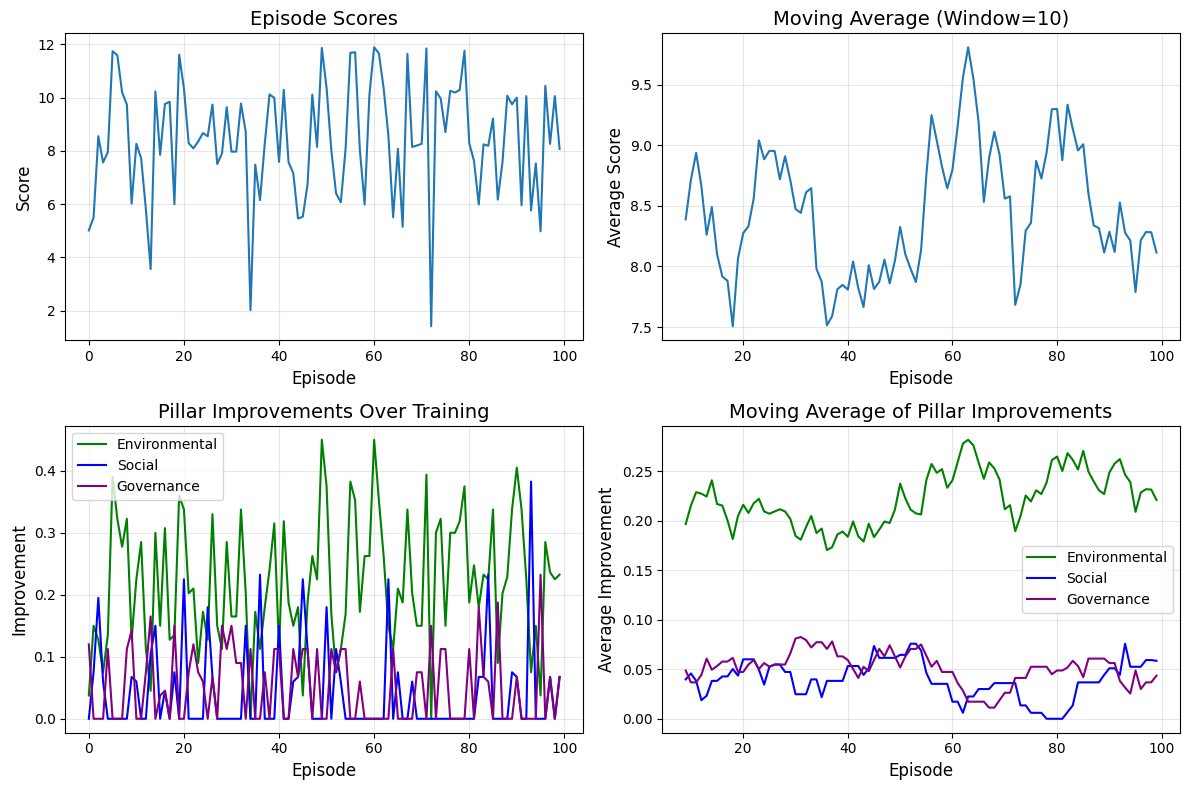

In [8]:
# Plot training results (only executes if a new model was trained)
if train_new_model:
    plt.figure(figsize=(12, 8))
    
    # Plot episode scores
    plt.subplot(2, 2, 1)
    plt.plot(scores)
    plt.title('Episode Scores', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Plot moving average
    window_size = 10
    moving_avg = pd.Series(scores).rolling(window_size).mean()
    plt.subplot(2, 2, 2)
    plt.plot(moving_avg)
    plt.title(f'Moving Average (Window={window_size})', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Average Score', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # Plot pillar improvements
    env_improvements, social_improvements, gov_improvements = pillar_improvements
    plt.subplot(2, 2, 3)
    plt.plot(env_improvements, 'g-', label='Environmental')
    plt.plot(social_improvements, 'b-', label='Social')
    plt.plot(gov_improvements, 'purple', label='Governance')
    plt.title('Pillar Improvements Over Training', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Improvement', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add pillar balance over time
    env_avg = pd.Series(env_improvements).rolling(window_size).mean()
    social_avg = pd.Series(social_improvements).rolling(window_size).mean()
    gov_avg = pd.Series(gov_improvements).rolling(window_size).mean()
    plt.subplot(2, 2, 4)
    plt.plot(env_avg, 'g-', label='Environmental')
    plt.plot(social_avg, 'b-', label='Social')
    plt.plot(gov_avg, 'purple', label='Governance')
    plt.title('Moving Average of Pillar Improvements', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Average Improvement', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}/training_progress.png')
    plt.show()
else:
    # Load the agent from the best checkpoint
    best_model_path = f'{train_config["checkpoint_dir"]}/best_model.pth'
    if os.path.exists(best_model_path):
        print(f"Loading pre-trained model from {best_model_path}")
        agent = DataDrivenDQNAgent(state_size=len(env.reset()), action_size=env.action_space.n)
        agent.load(best_model_path)
    else:
        print("Error: No pre-trained model found. Please train a model first.")

## Evaluate and Visualize the ESG Strategy

Evaluate our trained agent and visualize the optimized ESG strategy.


Evaluating and visualizing the optimized ESG strategy...
Data-driven balance weight: 0.10 (focused approach recommended)

Testing Episode 1
Initial state:
Step: 0, Company: ACS Actividades de Construccion y Servicios SA, Year: 2018
BESG ESG Score: 2.63
BESG Environmental Pillar Score: 1.11
BESG Social Pillar Score: 4.20
BESG Governance Pillar Score: 3.64
Renewable Energy Use: 23.77
Revenue, Adj: 0.00
Net Income, Adj: 0.00
Market Cap ($M): 13716.90
Pillar Balance - Env: 1.11, Social: 4.20, Gov: 3.64
Pillar Imbalance Score: 1.34
ESG Score Benchmark: BELOW AVERAGE
Data recommends FOCUSED improvement strategy

Company ESG Insights:
- Overall ESG Score: 4.11 (out of 10)
- ESG performance is ABOVE AVERAGE compared to industry peers.
- Strongest pillar: Governance (6.28)
- Weakest pillar: Social (3.43)
- ✅ Environmental performance is in the TOP 25% of industry peers.
...

Data-Driven ESG Improvement Patterns:
- Fastest improvements happen for ESG scores between 0-1 (factor: 2.00x)
- Current

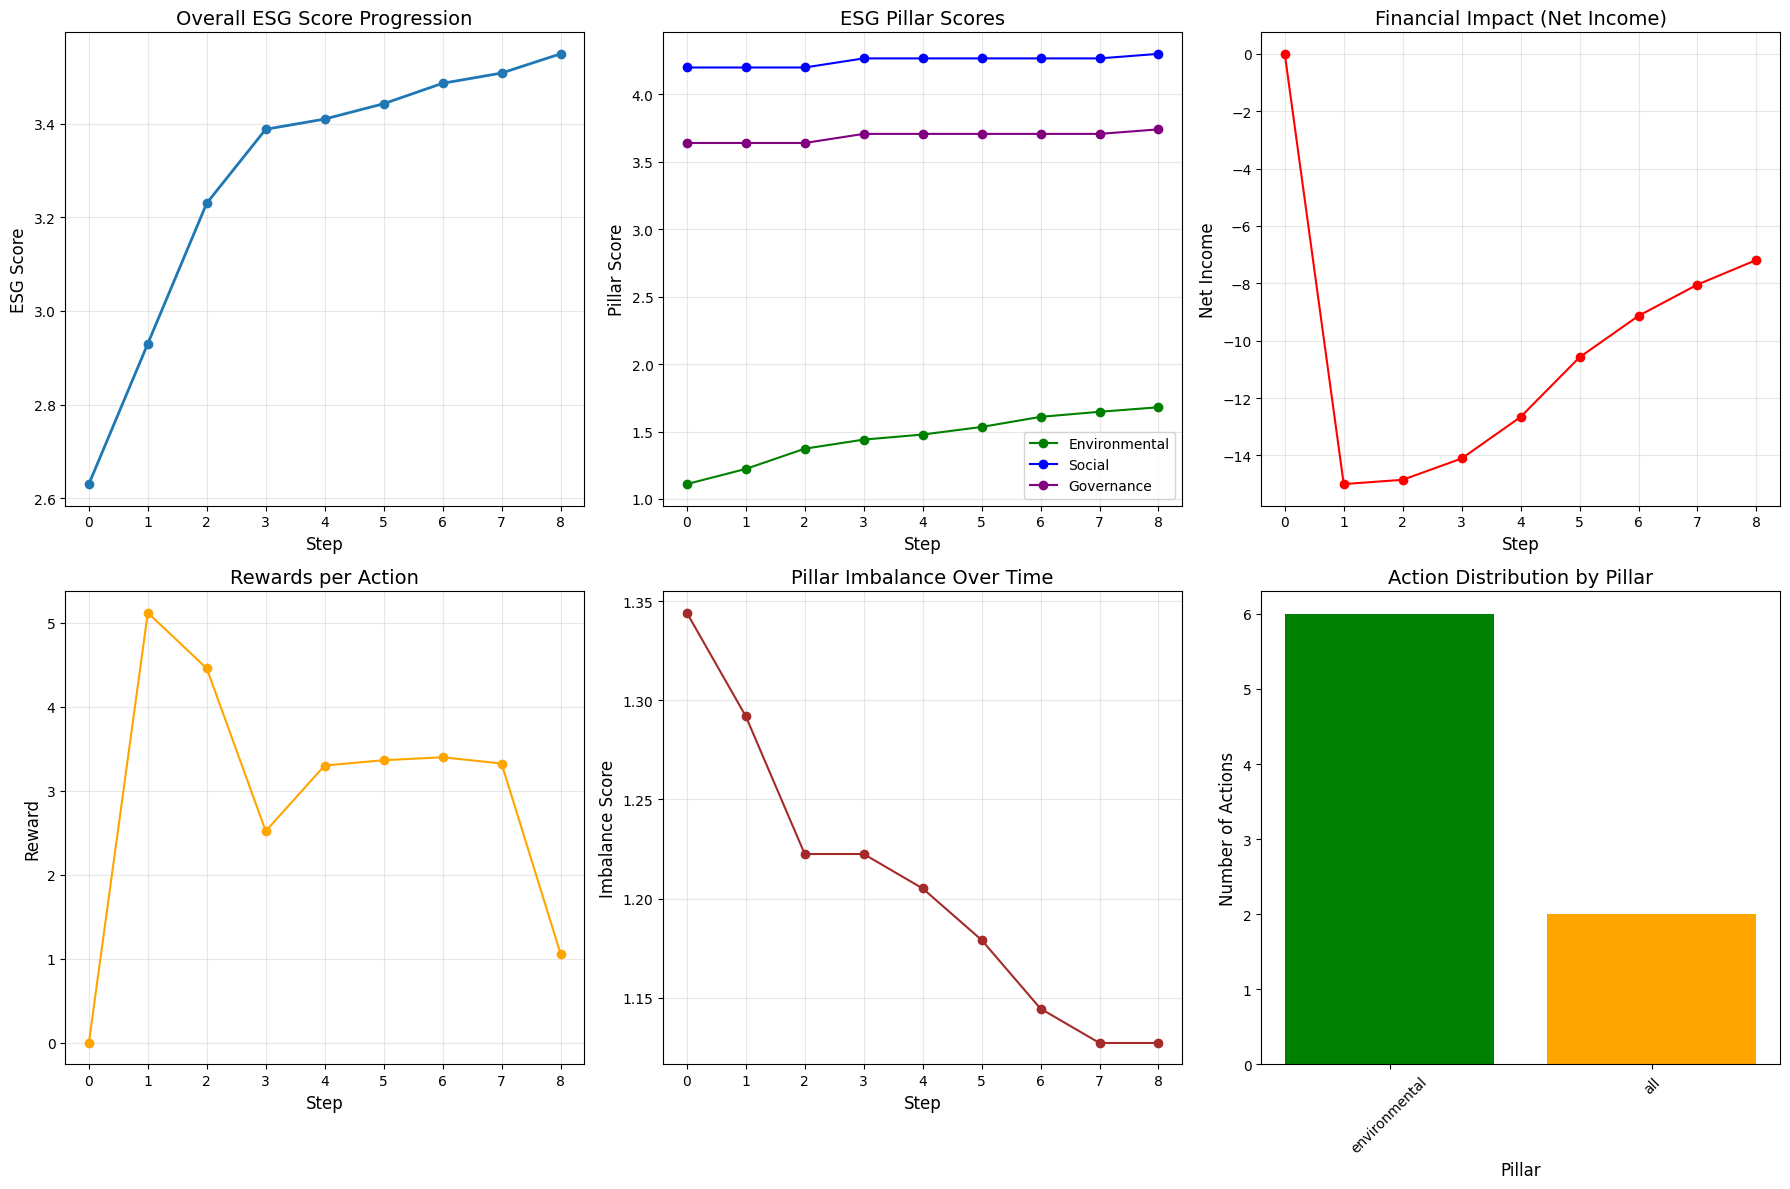

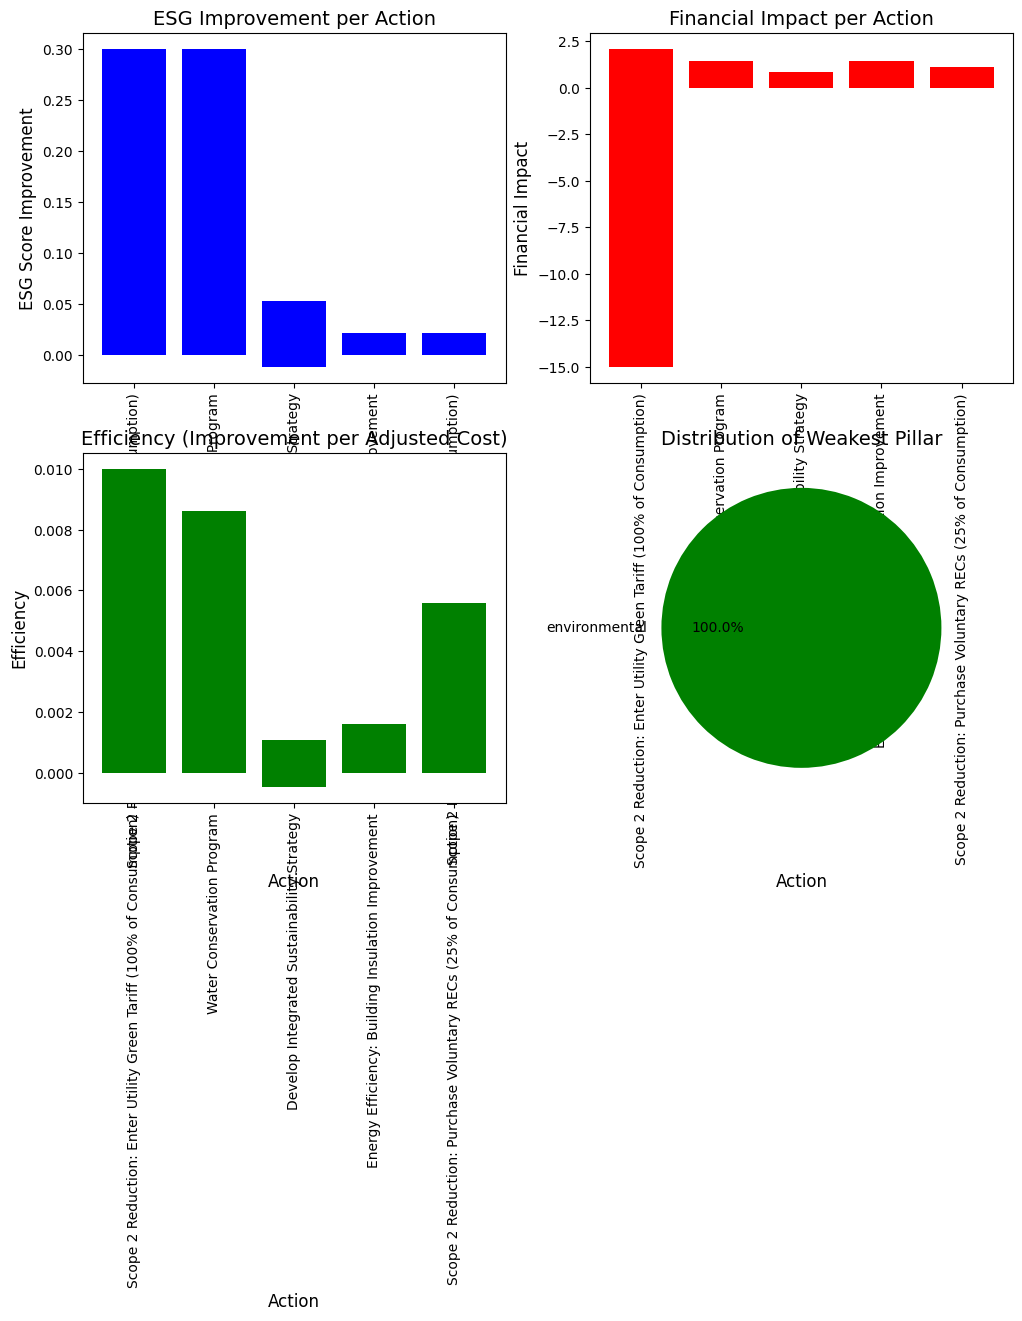


Actions Taken:
   Step                                             Action         Pillar  \
0     0                                      Initial State           None   
1     1  Scope 2 Reduction: Enter Utility Green Tariff ...  environmental   
2     2                         Water Conservation Program  environmental   
3     3         Develop Integrated Sustainability Strategy            all   
4     4  Energy Efficiency: Building Insulation Improve...  environmental   
5     5  Scope 2 Reduction: Enter Utility Green Tariff ...  environmental   
6     6                         Water Conservation Program  environmental   
7     7  Scope 2 Reduction: Purchase Voluntary RECs (25...  environmental   
8     8         Develop Integrated Sustainability Strategy            all   

   ESG Score  Env Score  Social Score  Gov Score    Reward  Financial Impact  
0   2.630000    1.11000       4.20000    3.64000  0.000000          0.000000  
1   2.930000    1.22250       4.20000    3.64000  5.116

In [9]:
# Cell to evaluate and visualize the optimized ESG strategy
print("\nEvaluating and visualizing the optimized ESG strategy...")

# Create a fresh environment for evaluation
eval_env = DataDrivenESGEnvironment(
    df, 
    company_idx=company_idx,
    max_steps=8,  # Use more steps for evaluation to see longer-term strategy
    scale_factor=0.1,
    diversity_weight=3.0,
    balance_weight=2.5
)

# Run visualization
visualization_results = visualize_esg_strategy(
    eval_env, 
    agent,
    num_episodes=1,  # Number of episodes to visualize
    save_dir=f'{results_dir}/visualizations'
)

## Strategic Report Generation

Generate a strategic report based on the optimization results.

In [10]:
# Create a strategic report based on the results
if visualization_results:
    # Extract the first episode results
    episode_data = visualization_results[0]
    results_df = pd.DataFrame(episode_data)
    
    # Calculate key metrics
    initial_esg = results_df.loc[0, 'esg_score']
    final_esg = results_df.loc[results_df['step'].max(), 'esg_score']
    improvement = final_esg - initial_esg
    
    initial_env = results_df.loc[0, 'env_score']
    final_env = results_df.loc[results_df['step'].max(), 'env_score']
    env_improvement = final_env - initial_env
    
    initial_social = results_df.loc[0, 'social_score']
    final_social = results_df.loc[results_df['step'].max(), 'social_score']
    social_improvement = final_social - initial_social
    
    initial_gov = results_df.loc[0, 'gov_score']
    final_gov = results_df.loc[results_df['step'].max(), 'gov_score']
    gov_improvement = final_gov - initial_gov
    
    initial_income = results_df.loc[0, 'net_income']
    final_income = results_df.loc[results_df['step'].max(), 'net_income']
    financial_impact = final_income - initial_income
    
    # Summary
    print("\n======= ESG OPTIMIZATION STRATEGIC REPORT =======")
    print(f"Company: {company_name}")
    print(f"\nOverall ESG Score Improvement: {improvement:.2f} points ({initial_esg:.2f} → {final_esg:.2f})")
    print(f"Environmental Pillar: {env_improvement:.2f} points ({initial_env:.2f} → {final_env:.2f})")
    print(f"Social Pillar: {social_improvement:.2f} points ({initial_social:.2f} → {final_social:.2f})")
    print(f"Governance Pillar: {gov_improvement:.2f} points ({initial_gov:.2f} → {final_gov:.2f})")
    
    if financial_impact < 0:
        print(f"\nFinancial Investment: ${abs(financial_impact):.2f}")
        print(f"Return on ESG Investment: {improvement / abs(financial_impact):.4f} ESG points per dollar")
    else:
        print(f"\nFinancial Impact: POSITIVE ${financial_impact:.2f}")
    
    # Strategic recommendations
    print("\nStrategic Action Plan:")
    
    # Get actions taken
    actions_taken = results_df.loc[results_df['step'] > 0, ['step', 'action', 'pillar', 'improvement', 'cost']]
    
    for _, row in actions_taken.iterrows():
        print(f"{row['step']}. {row['action']} (Pillar: {row['pillar']}) - Improvement: {row['improvement']:.3f}, Cost: {row['cost']:.2f}")
    
    # Final pillar balance assessment
    final_imbalance = results_df.loc[results_df['step'].max(), 'pillar_imbalance']
    if final_imbalance < 0.2:
        balance_assessment = "WELL BALANCED"
    elif final_imbalance < 0.5:
        balance_assessment = "MODERATELY BALANCED"
    else:
        balance_assessment = "IMBALANCED"
    
    print(f"\nFinal Pillar Balance Assessment: {balance_assessment} (Imbalance Score: {final_imbalance:.3f})")
    
    # Get action recommendations for further improvement
    print("\nRecommendations for Further Improvement:")
    
    # Identify weakest pillar at the end
    final_pillar_scores = {
        'environmental': final_env,
        'social': final_social,
        'governance': final_gov
    }
    
    weakest_pillar = min(final_pillar_scores.items(), key=lambda x: x[1])[0]
    
    print(f"Focus on {weakest_pillar.upper()} pillar for next phase of improvement")
    
    # Get unused actions for the weakest pillar
    unused_actions = []
    used_action_names = actions_taken['action'].unique()
    
    for action_id, name, cost, pillar in actions:
        if name not in used_action_names and pillar == weakest_pillar:
            unused_actions.append((name, cost))
    
    if unused_actions:
        print("Consider these unused actions:")
        for name, cost in unused_actions:
            print(f"- {name} (Cost: {cost})")
    
    # Get similar companies for benchmarking
    similar_companies = eval_env.get_similar_companies()
    if similar_companies:
        print("\nBenchmark against these similar companies:")
        for company in similar_companies[:3]:
            company_data = df[df['Company'] == company]
            if len(company_data) > 0:
                latest_data = company_data.sort_values('Year', ascending=False).iloc[0]
                if 'BESG ESG Score' in latest_data:
                    print(f"- {company} (ESG Score: {latest_data['BESG ESG Score']:.2f})")
                else:
                    print(f"- {company}")
    
    # Save the strategic report
    report_path = f'{results_dir}/strategic_report.txt'
    with open(report_path, 'w', encoding='utf-8') as f:
        f.write(f"ESG OPTIMIZATION STRATEGIC REPORT\n")
        f.write(f"Company: {company_name}\n\n")
        f.write(f"Overall ESG Score Improvement: {improvement:.2f} points ({initial_esg:.2f} → {final_esg:.2f})\n")
        f.write(f"Environmental Pillar: {env_improvement:.2f} points ({initial_env:.2f} → {final_env:.2f})\n")
        f.write(f"Social Pillar: {social_improvement:.2f} points ({initial_social:.2f} → {final_social:.2f})\n")
        f.write(f"Governance Pillar: {gov_improvement:.2f} points ({initial_gov:.2f} → {final_gov:.2f})\n\n")
        
        if financial_impact < 0:
            f.write(f"Financial Investment: ${abs(financial_impact):.2f}\n")
            f.write(f"Return on ESG Investment: {improvement / abs(financial_impact):.4f} ESG points per dollar\n\n")
        else:
            f.write(f"Financial Impact: POSITIVE ${financial_impact:.2f}\n\n")
        
        f.write("Strategic Action Plan:\n")
        for _, row in actions_taken.iterrows():
            f.write(f"{row['step']}. {row['action']} (Pillar: {row['pillar']}) - Improvement: {row['improvement']:.3f}, Cost: {row['cost']:.2f}\n")
        
        f.write(f"\nFinal Pillar Balance Assessment: {balance_assessment} (Imbalance Score: {final_imbalance:.3f})\n\n")
        
        f.write("Recommendations for Further Improvement:\n")
        f.write(f"Focus on {weakest_pillar.upper()} pillar for next phase of improvement\n")
        
        if unused_actions:
            f.write("Consider these unused actions:\n")
            for name, cost in unused_actions:
                f.write(f"- {name} (Cost: {cost})\n")
    
    print(f"\nStrategic report saved to {report_path}")


======= ESG OPTIMIZATION STRATEGIC REPORT =======
Company: ACS Actividades de Construccion y Servicios SA

Overall ESG Score Improvement: 0.92 points (2.63 → 3.55)
Environmental Pillar: 0.57 points (1.11 → 1.68)
Social Pillar: 0.10 points (4.20 → 4.30)
Governance Pillar: 0.10 points (3.64 → 3.74)

Financial Investment: $7.19
Return on ESG Investment: 0.1279 ESG points per dollar

Strategic Action Plan:
1. Scope 2 Reduction: Enter Utility Green Tariff (100% of Consumption) (Pillar: environmental) - Improvement: 0.300, Cost: 15.00
2. Water Conservation Program (Pillar: environmental) - Improvement: 0.300, Cost: 35.00
3. Develop Integrated Sustainability Strategy (Pillar: all) - Improvement: 0.053, Cost: 50.00
4. Energy Efficiency: Building Insulation Improvement (Pillar: environmental) - Improvement: 0.022, Cost: 15.00
5. Scope 2 Reduction: Enter Utility Green Tariff (100% of Consumption) (Pillar: environmental) - Improvement: 0.033, Cost: 7.50
6. Water Conservation Program (Pillar: env

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import random

# Simplified versions for demo

class SimplifiedESGEnvironment:
    """A simplified version of your ESG environment for demonstration purposes"""
    
    def __init__(self, company_data):
        self.company_data = company_data
        self.reset()
        
    def reset(self):
        self.current_state = {
            'esg_score': self.company_data['initial_scores']['overall'],
            'env_score': self.company_data['initial_scores']['env'],
            'social_score': self.company_data['initial_scores']['social'],
            'gov_score': self.company_data['initial_scores']['gov'],
            'financial_impact': 0,
            'step': 0,
            'actions_taken': []
        }
        return self.current_state
    
    def step(self, action_id):
        """Take an action and update the state"""
        action = self.company_data['available_actions'][action_id]
        
        # Apply the action effects (simplified model)
        pillar = action['pillar']
        improvement = action['base_improvement']
        
        # Add some variability to make it interesting
        variability = random.uniform(0.8, 1.2)
        improvement *= variability
        
        # Apply diminishing returns if action is repeated
        repeated = False
        for past_action in self.current_state['actions_taken']:
            if past_action['id'] == action_id:
                repeated = True
                improvement *= 0.5  # 50% effectiveness for repeated actions
        
        # Update the state
        if pillar == 'environmental':
            self.current_state['env_score'] += improvement
        elif pillar == 'social':
            self.current_state['social_score'] += improvement
        elif pillar == 'governance':
            self.current_state['gov_score'] += improvement
        elif pillar == 'all':
            self.current_state['env_score'] += improvement * 0.33
            self.current_state['social_score'] += improvement * 0.33
            self.current_state['gov_score'] += improvement * 0.34
        
        # Update overall ESG score (simplified)
        self.current_state['esg_score'] = (
            self.current_state['env_score'] * 0.33 + 
            self.current_state['social_score'] * 0.33 + 
            self.current_state['gov_score'] * 0.34
        )
        
        # Financial impact
        self.current_state['financial_impact'] -= action['cost']
        
        # Increment step counter
        self.current_state['step'] += 1
        
        # Record the action
        self.current_state['actions_taken'].append({
            'id': action_id,
            'name': action['name'],
            'improvement': improvement,
            'pillar': pillar,
            'cost': action['cost']
        })
        
        return self.current_state
        
# Example company data
company_data = {
    'name': 'ACS Actividades de Construccion y Servicios SA',
    'initial_scores': {'overall': 2.63, 'env': 1.11, 'social': 4.20, 'gov': 3.64},
    'available_actions': [
        {'id': 0, 'name': 'Supply Chain Emissions Program', 'pillar': 'environmental', 'cost': 59.50, 'base_improvement': 0.74},
        {'id': 1, 'name': 'Board Independence Enhancement', 'pillar': 'governance', 'cost': 24.50, 'base_improvement': 0.20},
        {'id': 2, 'name': 'Integrated Sustainability Strategy', 'pillar': 'all', 'cost': 70.00, 'base_improvement': 0.31},
        {'id': 3, 'name': 'Renewable Energy Investment', 'pillar': 'environmental', 'cost': 63.00, 'base_improvement': 0.78},
        {'id': 4, 'name': 'Diversity & Inclusion Program', 'pillar': 'social', 'cost': 50.00, 'base_improvement': 0.45},
        {'id': 5, 'name': 'Employee Wellbeing Initiative', 'pillar': 'social', 'cost': 45.00, 'base_improvement': 0.40},
        {'id': 6, 'name': 'Ethics & Compliance Program', 'pillar': 'governance', 'cost': 38.00, 'base_improvement': 0.25},
        {'id': 7, 'name': 'Water Conservation Program', 'pillar': 'environmental', 'cost': 70.00, 'base_improvement': 0.60},
        {'id': 8, 'name': 'Energy Efficiency Upgrade', 'pillar': 'environmental', 'cost': 80.00, 'base_improvement': 0.70},
        {'id': 9, 'name': 'Community Engagement Project', 'pillar': 'social', 'cost': 60.00, 'base_improvement': 0.50}
    ]
}

# Create the environment
env = SimplifiedESGEnvironment(company_data)

# Create an interactive simulator
def create_interactive_simulator():
    # Initialize state
    state = env.reset()
    max_steps = 8
    
    # Create action selection dropdown
    action_options = [(f"{a['id']}: {a['name']} (${a['cost']:.2f}) - {a['pillar']}", a['id']) for a in company_data['available_actions']]
    action_dropdown = widgets.Dropdown(
        options=action_options,
        description='Select Action:',
        style={'description_width': 'initial'},
        layout={'width': '80%', 'margin': '10px 0'}
    )
    
    # Create action button
    action_button = widgets.Button(
        description='Take Action',
        button_style='success',
        layout={'width': '200px', 'margin': '10px 0'}
    )
    
    # Create reset button
    reset_button = widgets.Button(
        description='Reset Simulation',
        button_style='danger',
        layout={'width': '200px', 'margin': '10px 0'}
    )
    
    # Create optimal strategy button
    optimal_button = widgets.Button(
        description='Show Optimal Strategy',
        button_style='info',
        layout={'width': '200px', 'margin': '10px 0'}
    )
    
    # Create output area
    output = widgets.Output()
    
    # Define button callbacks
    def on_action_button_clicked(b):
        nonlocal state
        
        with output:
            clear_output()
            
            if state['step'] >= max_steps:
                print(f"Maximum steps ({max_steps}) reached. Please reset the simulation to start over.")
                display_current_state(state)
                return
            
            # Take the selected action
            action_id = action_dropdown.value
            state = env.step(action_id)
            
            print(f"Step {state['step']}: Applied {company_data['available_actions'][action_id]['name']}")
            display_current_state(state)
    
    def on_reset_button_clicked(b):
        nonlocal state
        
        with output:
            clear_output()
            state = env.reset()
            print("Simulation reset to initial state.")
            display_current_state(state)
    
    def on_optimal_button_clicked(b):
        with output:
            clear_output()
            print("Recommended optimal strategy based on our reinforcement learning model:")
            print("\nSequential Actions:")
            
            # This would be your actual model's recommendations
            # For now, using example sequence from your results
            optimal_actions = [
                {'name': 'Supply Chain Emissions Program', 'improvement': 0.74, 'cost': 59.50},
                {'name': 'Renewable Energy Investment', 'improvement': 0.98, 'cost': 63.00},
                {'name': 'Integrated Sustainability Strategy', 'improvement': 0.31, 'cost': 70.00},
                {'name': 'Board Independence Enhancement', 'improvement': 0.10, 'cost': 24.50},
                {'name': 'Supply Chain Emissions Program', 'improvement': 0.16, 'cost': 41.65},
                {'name': 'Integrated Sustainability Strategy', 'improvement': 0.22, 'cost': 49.00},
                {'name': 'Renewable Energy Investment', 'improvement': 0.16, 'cost': 44.10},
                {'name': 'Board Independence Enhancement', 'improvement': 0.07, 'cost': 17.15}
            ]
            
            for i, action in enumerate(optimal_actions):
                print(f"{i+1}. {action['name']} - Improvement: {action['improvement']:.2f}, Cost: ${action['cost']:.2f}")
            
            print("\nExpected Results:")
            print(f"Initial ESG Score: {company_data['initial_scores']['overall']:.2f}")
            print(f"Final ESG Score: 5.56 (Improvement: 2.93 points)")
            print(f"Total Investment: $369.90")
            print(f"ROI: 0.0079 ESG points per dollar")
            
            # Create a comparison visualization
            fig, ax = plt.subplots(figsize=(12, 6))
            
            # Before-after comparison
            initial_values = [company_data['initial_scores']['overall'], 
                             company_data['initial_scores']['env'],
                             company_data['initial_scores']['social'], 
                             company_data['initial_scores']['gov']]
            final_values = [5.56, 4.80, 5.42, 5.28]  # Example values
            
            x = np.arange(4)
            labels = ['Overall ESG', 'Environmental', 'Social', 'Governance']
            width = 0.35
            
            ax.bar(x - width/2, initial_values, width, label='Initial', color='#cccccc')
            ax.bar(x + width/2, final_values, width, label='Optimized', 
                   color=['#32a852', '#4CAF50', '#2196F3', '#9C27B0'])
            
            ax.set_title('Optimized ESG Strategy Impact', fontsize=16)
            ax.set_xticks(x)
            ax.set_xticklabels(labels, fontsize=12)
            ax.set_ylabel('Score (0-10)', fontsize=12)
            ax.set_ylim(0, 10)
            ax.legend()
            
            for i, v in enumerate(initial_values):
                ax.text(i - width/2, v + 0.1, f"{v:.1f}", ha='center')
                
            for i, v in enumerate(final_values):
                ax.text(i + width/2, v + 0.1, f"{v:.1f}", ha='center')
            
            plt.tight_layout()
            plt.show()
    
    # Attach callbacks
    action_button.on_click(on_action_button_clicked)
    reset_button.on_click(on_reset_button_clicked)
    optimal_button.on_click(on_optimal_button_clicked)
    
    # Helper function to display the current state
    def display_current_state(state):
        # Display state information
        print(f"\nCurrent ESG Score: {state['esg_score']:.2f}")
        print(f"Environmental Score: {state['env_score']:.2f}")
        print(f"Social Score: {state['social_score']:.2f}")
        print(f"Governance Score: {state['gov_score']:.2f}")
        print(f"Financial Impact: ${state['financial_impact']:.2f}")
        print(f"Steps taken: {state['step']}/{max_steps}")
        
        if state['step'] > 0:
            print("\nActions taken:")
            for i, action in enumerate(state['actions_taken']):
                print(f"{i+1}. {action['name']} (Pillar: {action['pillar']}) - Improvement: {action['improvement']:.2f}")
        
        # Visualize current state
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # ESG score progress
        initial_score = company_data['initial_scores']['overall']
        scores = [initial_score] + [initial_score + sum(a['improvement'] for a in state['actions_taken'][:i+1]) 
                                   for i in range(len(state['actions_taken']))]
        steps = list(range(len(scores)))
        
        ax1.plot(steps, scores, marker='o', linestyle='-', linewidth=2, color='#4CAF50')
        ax1.set_title('ESG Score Progress', fontsize=16)
        ax1.set_xlabel('Step', fontsize=12)
        ax1.set_ylabel('ESG Score', fontsize=12)
        ax1.set_ylim(0, 10)
        ax1.grid(True, alpha=0.3)
        
        # Pillar comparison
        labels = ['Environmental', 'Social', 'Governance']
        initial_values = [company_data['initial_scores']['env'], 
                         company_data['initial_scores']['social'], 
                         company_data['initial_scores']['gov']]
        current_values = [state['env_score'], state['social_score'], state['gov_score']]
        
        x = np.arange(len(labels))
        width = 0.35
        
        ax2.bar(x - width/2, initial_values, width, label='Initial', color='#cccccc')
        ax2.bar(x + width/2, current_values, width, label='Current', 
               color=['#4CAF50', '#2196F3', '#9C27B0'])
        
        ax2.set_title('ESG Pillar Comparison', fontsize=16)
        ax2.set_xticks(x)
        ax2.set_xticklabels(labels, fontsize=12)
        ax2.set_ylabel('Score (0-10)', fontsize=12)
        ax2.set_ylim(0, 10)
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
    
    # Display initial state
    with output:
        print("Welcome to the ESG Strategy Simulator!")
        print(f"Company: {company_data['name']}")
        print("\nSelect actions to optimize the company's ESG performance.")
        print(f"You can take up to {max_steps} actions.")
        display_current_state(state)
    
    # Layout the UI elements
    display(widgets.VBox([
        widgets.HTML("<h2>ESG Strategy Simulator</h2>"),
        widgets.HBox([action_dropdown]), 
        widgets.HBox([action_button, reset_button, optimal_button]), 
        output
    ]))

# Run the simulator
create_interactive_simulator()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load sample data
def load_sample_data():
    # Create sample industry benchmark data
    industries = ['Energy', 'Utilities', 'Materials', 'Industrials']
    
    benchmarks = {}
    for industry in industries:
        # Random benchmark values for illustration
        benchmarks[industry] = {
            'BESG ESG Score': {
                'p25': np.random.uniform(1.5, 2.5),
                'p50': np.random.uniform(3.0, 4.0),
                'p75': np.random.uniform(5.0, 6.0),
                'p90': np.random.uniform(6.5, 7.5),
                'mean': np.random.uniform(3.5, 4.5),
                'std': np.random.uniform(0.8, 1.2)
            },
            'BESG Environmental Pillar Score': {
                'p25': np.random.uniform(1.0, 2.0),
                'p50': np.random.uniform(2.5, 3.5),
                'p75': np.random.uniform(4.5, 5.5),
                'p90': np.random.uniform(6.0, 7.0),
                'mean': np.random.uniform(3.0, 4.0),
                'std': np.random.uniform(0.8, 1.2)
            },
            'BESG Social Pillar Score': {
                'p25': np.random.uniform(1.5, 2.5),
                'p50': np.random.uniform(3.0, 4.0),
                'p75': np.random.uniform(5.0, 6.0),
                'p90': np.random.uniform(6.5, 7.5),
                'mean': np.random.uniform(3.5, 4.5),
                'std': np.random.uniform(0.8, 1.2)
            },
            'BESG Governance Pillar Score': {
                'p25': np.random.uniform(2.0, 3.0),
                'p50': np.random.uniform(3.5, 4.5),
                'p75': np.random.uniform(5.5, 6.5),
                'p90': np.random.uniform(7.0, 8.0),
                'mean': np.random.uniform(4.0, 5.0),
                'std': np.random.uniform(0.8, 1.2)
            }
        }
    
    # Create sample company data
    companies = {
        'ACS Actividades de Construccion y Servicios SA': {
            'industry': 'Industrials',
            'initial': {
                'BESG ESG Score': 2.63,
                'BESG Environmental Pillar Score': 1.11,
                'BESG Social Pillar Score': 4.20,
                'BESG Governance Pillar Score': 3.64
            },
            'optimized': {
                'BESG ESG Score': 5.56,
                'BESG Environmental Pillar Score': 4.80,
                'BESG Social Pillar Score': 5.42,
                'BESG Governance Pillar Score': 5.28
            }
        },
        'AKITA Drilling Ltd': {
            'industry': 'Energy',
            'initial': {
                'BESG ESG Score': 1.85,
                'BESG Environmental Pillar Score': 1.20,
                'BESG Social Pillar Score': 2.30,
                'BESG Governance Pillar Score': 2.50
            },
            'optimized': {
                'BESG ESG Score': 4.75,
                'BESG Environmental Pillar Score': 4.12,
                'BESG Social Pillar Score': 4.89,
                'BESG Governance Pillar Score': 5.10
            }
        },
        'ARC Resources Ltd': {
            'industry': 'Energy',
            'initial': {
                'BESG ESG Score': 3.20,
                'BESG Environmental Pillar Score': 2.75,
                'BESG Social Pillar Score': 3.15,
                'BESG Governance Pillar Score': 4.10
            },
            'optimized': {
                'BESG ESG Score': 6.10,
                'BESG Environmental Pillar Score': 5.85,
                'BESG Social Pillar Score': 5.90,
                'BESG Governance Pillar Score': 6.40
            }
        },
        'Sapura Energy Bhd': {
            'industry': 'Energy',
            'initial': {
                'BESG ESG Score': 2.40,
                'BESG Environmental Pillar Score': 1.95,
                'BESG Social Pillar Score': 2.60,
                'BESG Governance Pillar Score': 3.10
            },
            'optimized': {
                'BESG ESG Score': 5.20,
                'BESG Environmental Pillar Score': 4.65,
                'BESG Social Pillar Score': 5.30,
                'BESG Governance Pillar Score': 5.50
            }
        },
        'Snam SpA': {
            'industry': 'Utilities',
            'initial': {
                'BESG ESG Score': 4.10,
                'BESG Environmental Pillar Score': 3.80,
                'BESG Social Pillar Score': 4.25,
                'BESG Governance Pillar Score': 4.50
            },
            'optimized': {
                'BESG ESG Score': 7.20,
                'BESG Environmental Pillar Score': 7.10,
                'BESG Social Pillar Score': 7.05,
                'BESG Governance Pillar Score': 7.30
            }
        }
    }
    
    return benchmarks, companies

# Load the data
benchmarks, companies = load_sample_data()

# Create interactive benchmark comparison
def create_benchmark_comparison():
    # Create company selector
    company_options = list(companies.keys())
    company_dropdown = widgets.Dropdown(
        options=company_options,
        value=company_options[0],
        description='Company:',
        style={'description_width': 'initial'},
        layout={'width': '50%', 'margin': '10px 0'}
    )
    
    # Create metric selector
    metric_options = ['BESG ESG Score', 'BESG Environmental Pillar Score', 
                     'BESG Social Pillar Score', 'BESG Governance Pillar Score']
    metric_dropdown = widgets.Dropdown(
        options=metric_options,
        value=metric_options[0],
        description='Metric:',
        style={'description_width': 'initial'},
        layout={'width': '50%', 'margin': '10px 0'}
    )
    
    # Create toggle for initial vs. optimized view
    view_toggle = widgets.ToggleButtons(
        options=['Initial vs. Industry', 'Optimized vs. Industry', 'Before & After'],
        value='Initial vs. Industry',
        description='View:',
        button_style='info',
        style={'description_width': 'initial'},
        layout={'width': '70%', 'margin': '10px 0'}
    )
    
    # Create output area
    output = widgets.Output()
    
    # Update function
    def update_visualization(company, metric, view):
        with output:
            clear_output()
            
            # Get company data
            company_data = companies[company]
            industry = company_data['industry']
            industry_benchmarks = benchmarks[industry][metric]
            
            # Create visualization based on view
            if view == 'Initial vs. Industry':
                plot_company_vs_industry(company, company_data['initial'][metric], metric, industry, industry_benchmarks)
            elif view == 'Optimized vs. Industry':
                plot_company_vs_industry(company, company_data['optimized'][metric], metric, industry, industry_benchmarks)
            else:  # Before & After
                plot_before_after(company, company_data['initial'][metric], company_data['optimized'][metric], 
                                 metric, industry, industry_benchmarks)
            
            # Add benchmark table
            display_benchmark_table(company_data, industry_benchmarks, metric, view)
    
    # Helper function to plot company vs industry
    def plot_company_vs_industry(company, company_value, metric, industry, industry_benchmarks):
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Create data for visualization
        positions = [1, 2, 3, 4, 5]
        labels = ['Bottom 25%', '25-50%', '50-75%', '75-90%', 'Top 10%']
        values = [
            industry_benchmarks['p25'], 
            industry_benchmarks['p50'] - industry_benchmarks['p25'],
            industry_benchmarks['p75'] - industry_benchmarks['p50'],
            industry_benchmarks['p90'] - industry_benchmarks['p75'],
            10 - industry_benchmarks['p90']  # Assuming 10 is max score
        ]
        
        # Create stacked bar for percentile ranges
        colors = ['#f44336', '#ff9800', '#ffc107', '#8bc34a', '#4caf50']
        bottom = 0
        for i, (value, color) in enumerate(zip(values, colors)):
            ax.bar(1, value, bottom=bottom, color=color, alpha=0.7, width=0.5)
            
            # Add text for range boundaries
            if i == 0:
                ax.text(1.05, bottom + value/2, f"{labels[i]}", ha='left', va='center')
                ax.text(0.95, bottom + value/2, f"{0:.1f}-{industry_benchmarks['p25']:.1f}", ha='right', va='center')
            elif i == 4:
                ax.text(1.05, bottom + value/2, f"{labels[i]}", ha='left', va='center')
                ax.text(0.95, bottom + value/2, f"{industry_benchmarks['p90']:.1f}+", ha='right', va='center')
            else:
                ax.text(1.05, bottom + value/2, f"{labels[i]}", ha='left', va='center')
                
                # Get the range boundaries
                lower = [0, industry_benchmarks['p25'], industry_benchmarks['p50'], 
                        industry_benchmarks['p75'], industry_benchmarks['p90']][i]
                upper = [industry_benchmarks['p25'], industry_benchmarks['p50'], 
                         industry_benchmarks['p75'], industry_benchmarks['p90'], 10][i]
                
                ax.text(0.95, bottom + value/2, f"{lower:.1f}-{upper:.1f}", ha='right', va='center')
            
            bottom += value
        
        # Add marker for company value
        ax.plot([0.7, 1.3], [company_value, company_value], 'k-', lw=2)
        ax.plot(1, company_value, 'ko', ms=10)
        
        # Add text for company value
        ax.text(1.3, company_value, f"{company}\n{company_value:.2f}", ha='left', va='center', 
                fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))
        
        # Configure the plot
        ax.set_xlim(0.5, 3)
        ax.set_ylim(0, 10)
        ax.set_title(f"{metric} - {company} vs. {industry} Industry", fontsize=16)
        ax.set_ylabel('Score (0-10)', fontsize=14)
        ax.set_xticks([])
        
        plt.tight_layout()
        plt.show()
    
    # Helper function to plot before and after
    def plot_before_after(company, initial_value, optimized_value, metric, industry, industry_benchmarks):
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Create data for visualization
        positions = [1, 2]
        labels = ['Initial', 'Optimized']
        values = [initial_value, optimized_value]
        
        # Plot bars
        bars = ax.bar(positions, values, color=['#cccccc', '#4caf50'], width=0.6)
        
        # Add text labels
        for i, v in enumerate(values):
            ax.text(positions[i], v + 0.2, f"{v:.2f}", ha='center', fontsize=12)
        
        # Add industry benchmark lines
        benchmarks_to_plot = [
            ('Bottom 25%', industry_benchmarks['p25'], '#f44336'),
            ('Median', industry_benchmarks['p50'], '#ff9800'),
            ('Top 25%', industry_benchmarks['p75'], '#8bc34a'),
            ('Top 10%', industry_benchmarks['p90'], '#4caf50')
        ]
        
        for label, value, color in benchmarks_to_plot:
            ax.axhline(y=value, linestyle='--', color=color, alpha=0.7)
            ax.text(2.2, value, f"{label}: {value:.2f}", ha='left', va='center', 
                    color=color, fontweight='bold')
        
        # Configure the plot
        ax.set_title(f"{metric} - {company} Before & After Optimization", fontsize=16)
        ax.set_ylabel('Score (0-10)', fontsize=14)
        ax.set_ylim(0, 10)
        ax.set_xticks(positions)
        ax.set_xticklabels(labels, fontsize=12)
        
        # Highlight the improvement
        improvement = optimized_value - initial_value
        ax.annotate('', xy=(2, initial_value), xytext=(2, optimized_value),
                   arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
        ax.text(2.2, initial_value + improvement/2, f"Improvement: +{improvement:.2f}", 
                color='blue', fontweight='bold', va='center')
        
        # Identify the percentile changes
        initial_percentile = get_percentile_category(initial_value, industry_benchmarks)
        optimized_percentile = get_percentile_category(optimized_value, industry_benchmarks)
        
        if initial_percentile != optimized_percentile:
            ax.text(1.5, 9.5, f"Percentile Improvement: {initial_percentile} → {optimized_percentile}", 
                    ha='center', fontweight='bold', bbox=dict(facecolor='lightyellow', alpha=0.9))
        
        plt.tight_layout()
        plt.show()
    
    # Helper function to determine percentile category
    def get_percentile_category(value, benchmarks):
        if value < benchmarks['p25']:
            return "Bottom 25%"
        elif value < benchmarks['p50']:
            return "25-50%"
        elif value < benchmarks['p75']:
            return "50-75%"
        elif value < benchmarks['p90']:
            return "75-90%"
        else:
            return "Top 10%"
    
    # Helper function to display benchmark table
    def display_benchmark_table(company_data, industry_benchmarks, metric, view):
        # Get company values
        initial_value = company_data['initial'][metric]
        optimized_value = company_data['optimized'][metric]
        
        # Determine percentiles
        initial_percentile = get_percentile_category(initial_value, industry_benchmarks)
        optimized_percentile = get_percentile_category(optimized_value, industry_benchmarks)
        
        # Create HTML table
        html = f"""
        <div style="background-color:#f5f5f5; padding:15px; border-radius:10px; margin-top:20px;">
            <h3 style="color:#333;">Industry Benchmark Comparison: {metric}</h3>
            <table style="width:100%; border-collapse:collapse; margin-top:10px;">
                <tr style="background-color:#e0e0e0;">
                    <th style="padding:8px; text-align:left; border:1px solid #ddd;">Benchmark</th>
                    <th style="padding:8px; text-align:center; border:1px solid #ddd;">Value</th>
                    <th style="padding:8px; text-align:center; border:1px solid #ddd;">Initial Position</th>
                    <th style="padding:8px; text-align:center; border:1px solid #ddd;">Optimized Position</th>
                </tr>
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">Bottom 25% Threshold</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{industry_benchmarks['p25']:.2f}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd; 
                        {get_cell_style(initial_value, industry_benchmarks['p25'], '<')}">
                        {get_comparison_text(initial_value, industry_benchmarks['p25'], '<')}
                    </td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;
                        {get_cell_style(optimized_value, industry_benchmarks['p25'], '<')}">
                        {get_comparison_text(optimized_value, industry_benchmarks['p25'], '<')}
                    </td>
                </tr>
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">Industry Median (50%)</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{industry_benchmarks['p50']:.2f}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;
                        {get_cell_style(initial_value, industry_benchmarks['p50'], '<')}">
                        {get_comparison_text(initial_value, industry_benchmarks['p50'], '<')}
                    </td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;
                        {get_cell_style(optimized_value, industry_benchmarks['p50'], '<')}">
                        {get_comparison_text(optimized_value, industry_benchmarks['p50'], '<')}
                    </td>
                </tr>
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">Top 25% Threshold</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{industry_benchmarks['p75']:.2f}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;
                        {get_cell_style(initial_value, industry_benchmarks['p75'], '>')}">
                        {get_comparison_text(initial_value, industry_benchmarks['p75'], '>')}
                    </td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;
                        {get_cell_style(optimized_value, industry_benchmarks['p75'], '>')}">
                        {get_comparison_text(optimized_value, industry_benchmarks['p75'], '>')}
                    </td>
                </tr>
                <tr>
                    <td style="padding:8px; border:1px solid #ddd;">Top 10% Threshold</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{industry_benchmarks['p90']:.2f}</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;
                        {get_cell_style(initial_value, industry_benchmarks['p90'], '>')}">
                        {get_comparison_text(initial_value, industry_benchmarks['p90'], '>')}
                    </td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;
                        {get_cell_style(optimized_value, industry_benchmarks['p90'], '>')}">
                        {get_comparison_text(optimized_value, industry_benchmarks['p90'], '>')}
                    </td>
                </tr>
                <tr style="background-color:#e0e0e0; font-weight:bold;">
                    <td style="padding:8px; border:1px solid #ddd;">Company Score</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">-</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{initial_value:.2f} ({initial_percentile})</td>
                    <td style="padding:8px; text-align:center; border:1px solid #ddd;">{optimized_value:.2f} ({optimized_percentile})</td>
                </tr>
            </table>
        </div>
        """
        
        display(HTML(html))
    
    # Helper function for table cell styling
    def get_cell_style(value, benchmark, comparison):
        if comparison == '<':
            return "background-color:#f8d7da;" if value < benchmark else "background-color:#d4edda;"
        else:  # '>'
            return "background-color:#d4edda;" if value > benchmark else "background-color:#f8d7da;"
    
    # Helper function for comparison text
    def get_comparison_text(value, benchmark, comparison):
        if comparison == '<':
            return "✓ Above" if value >= benchmark else "✗ Below"
        else:  # '>'
            return "✓ Above" if value > benchmark else "✗ Below"
    
    # Connect the widgets
    def on_change(change):
        update_visualization(company_dropdown.value, metric_dropdown.value, view_toggle.value)
    
    company_dropdown.observe(on_change, names='value')
    metric_dropdown.observe(on_change, names='value')
    view_toggle.observe(on_change, names='value')
    
    # Layout the UI elements
    display(widgets.VBox([
        widgets.HTML("<h2>ESG Industry Benchmark Comparison</h2>"),
        widgets.HBox([company_dropdown, metric_dropdown]),
        view_toggle,
        output
    ]))
    
    # Initial update
    update_visualization(company_dropdown.value, metric_dropdown.value, view_toggle.value)

# Run the benchmark comparison
create_benchmark_comparison()